<a href="https://colab.research.google.com/github/Shivam24012001/SnapLens-Cameras-Sales-Analysis/blob/main/Shivam_SnapLens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
Budget=pd.read_csv('https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/BudgetTable.csv')
Budget.head()

,Month,Region,State,Product Category,Budgeted Quantity
0,January,North,Delhi,Professional,50
1,January,North,Delhi,Lifestyle,50
2,January,North,Delhi,Adventure,50
3,January,North,Punjab,Professional,50
4,January,North,Punjab,Lifestyle,110


In [ ]:
Transactions=pd.read_csv('https://raw.githubusercontent.com/Invact-Abhay/DOE/refs/heads/main/ActualTable.csv')
Transactions.head()

,Date,Month,Region,State,Product Category,Quantity Sold
0,1/27/2023,January,North,Delhi,Professional,10
1,1/21/2023,January,North,Delhi,Professional,60
2,1/24/2023,January,North,Delhi,Professional,40
3,1/20/2023,January,North,Delhi,Professional,40
4,1/16/2023,January,North,Delhi,Professional,30


In [ ]:
Budget.columns
Budget.columns=Budget.columns.str.lower().str.replace(" ","_")
Budget.columns

Index(['month', 'region', 'state', 'product_category', 'budgeted_quantity'], dtype='object')

In [ ]:
Transactions.columns
Transactions.columns=Transactions.columns.str.lower().str.replace(" ","_")
Transactions.columns

Index(['date', 'month', 'region', 'state', 'product_category',
       'quantity_sold'],
      dtype='object')

In [ ]:
actual=Transactions.groupby(['month','region','state','product_category'])['quantity_sold'].sum()
actual.head()

month  region  state    product_category
April  North   Delhi    Adventure           130
                        Lifestyle            60
                        Professional         60
               Haryana  Adventure            10
                        Lifestyle           180
Name: quantity_sold, dtype: int64

In [ ]:
merged_table=pd.merge(Budget,actual,on=['month','region','state','product_category'],how='left')
merged_table.head()

,month,region,state,product_category,budgeted_quantity,quantity_sold
0,January,North,Delhi,Professional,50,230.0
1,January,North,Delhi,Lifestyle,50,130.0
2,January,North,Delhi,Adventure,50,280.0
3,January,North,Punjab,Professional,50,120.0
4,January,North,Punjab,Lifestyle,110,150.0


In [ ]:
merged_table['variance']=merged_table['quantity_sold']-merged_table['budgeted_quantity']
merged_table.head()

,month,region,state,product_category,budgeted_quantity,quantity_sold,variance
0,January,North,Delhi,Professional,50,230.0,180.0
1,January,North,Delhi,Lifestyle,50,130.0,80.0
2,January,North,Delhi,Adventure,50,280.0,230.0
3,January,North,Punjab,Professional,50,120.0,70.0
4,January,North,Punjab,Lifestyle,110,150.0,40.0


In [ ]:
month_mapping={'January':1,
               'February':2,
               'March':3,
               'April':4,
               'May':5,
               'June':6,
               'July':7,
               'August':8,
               'September':9,
               'October':10,
               'November':11,
               'December':12
               }
merged_table['month_number']=merged_table['month'].map(month_mapping)
merged_table.head()

,month,region,state,product_category,budgeted_quantity,quantity_sold,variance,month_mapping,month_number
0,January,North,Delhi,Professional,50,230.0,180.0,1,1
1,January,North,Delhi,Lifestyle,50,130.0,80.0,1,1
2,January,North,Delhi,Adventure,50,280.0,230.0,1,1
3,January,North,Punjab,Professional,50,120.0,70.0,1,1
4,January,North,Punjab,Lifestyle,110,150.0,40.0,1,1


In [ ]:
month_variance=merged_table.groupby(['month','month_number'])['variance'].sum().reset_index()

sorted_month_variance=month_variance.sort_values('month_number',ascending=True)
sorted_month_variance

,month,month_number,variance
4,January,1,1310.0
3,February,2,440.0
7,March,3,640.0
0,April,4,-160.0
8,May,5,-340.0
6,June,6,-1040.0
5,July,7,-600.0
1,August,8,-770.0
11,September,9,180.0
10,October,10,-2070.0


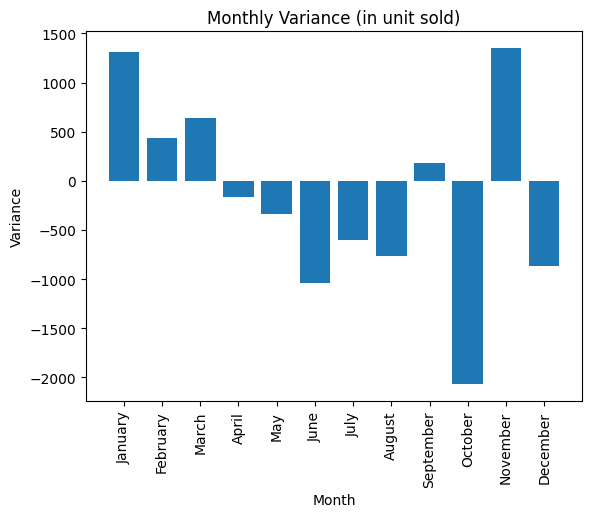

In [ ]:
plt.bar(x=sorted_month_variance['month'],height=sorted_month_variance['variance'])
plt.xlabel('Month')
plt.ylabel('Variance')
plt.title('Monthly Variance (in unit sold)')
plt.xticks(sorted_month_variance['month'],rotation=90)
plt.show()

In [ ]:
regionwise_variance=merged_table.groupby(['region'])['variance'].sum().reset_index()
regionwise_variance

,region,variance
0,North,-720.0
1,South,-860.0
2,West,-350.0


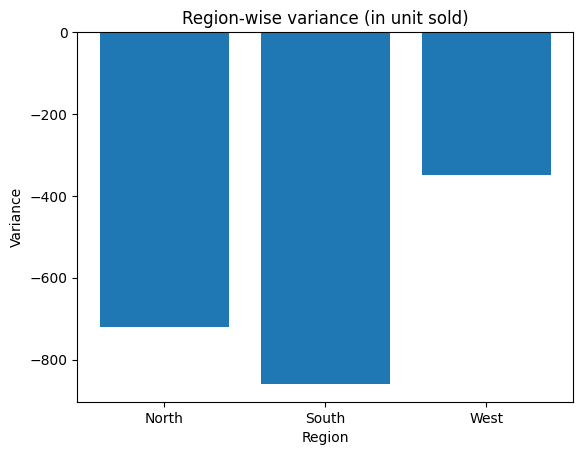

In [ ]:
plt.bar(x=regionwise_variance['region'],height=regionwise_variance['variance'])
plt.xlabel('Region')
plt.ylabel('Variance')
plt.title('Region-wise variance (in unit sold)')
plt.show()

In [ ]:
statewise_variance=merged_table.groupby(['state'])['variance'].sum().reset_index()
statewise_variance

,state,variance
0,Delhi,-140.0
1,Gujarat,-120.0
2,Haryana,-500.0
3,Karnataka,750.0
4,Kerala,210.0
5,Maharashtra,480.0
6,Punjab,-80.0
7,Rajasthan,-710.0
8,Tamil Nadu,-1820.0


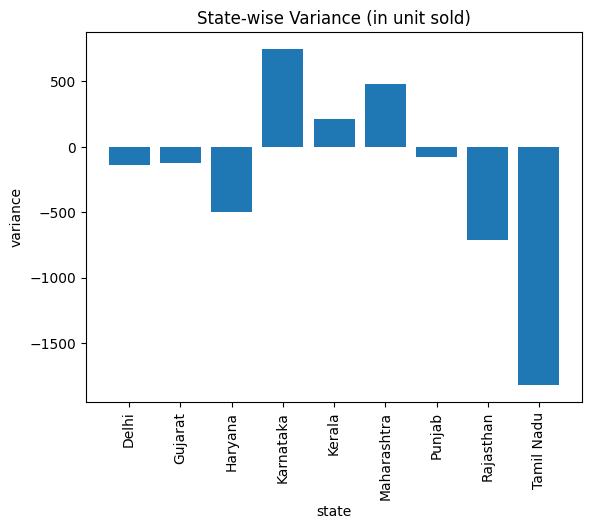

In [ ]:
plt.bar(x=statewise_variance['state'],height=statewise_variance['variance'])
plt.xlabel('state')
plt.ylabel('variance')
plt.title('State-wise Variance (in unit sold)')
plt.xticks(statewise_variance['state'],rotation=90)
plt.show()